3 types of ensemble learning:
Bagging,Boosting,Stacking

Boosting 3types:Ada boost,gradient boosting,xg boost
here we will focus only on adaboost

---------------
#boosting works sequentially while bagging works paralelly
adaboost:
#different weithtage to base models .more weithage for mis classified ones.
#it works based on decision stump-max depth=1
decision stump is done fro each features and then gini index i.e. impurity is calcualted
#iitially all gets rows equal weithage then it changes
#model1 if classifies some rows as wrong then it is given higher weithage so it will be picked and passed on to next and goes on sequentially.

#It is forest of stumps but not trees
#based on each model weithage and its prediction,final result is calculated(if out of total 5base models,if 3 says 1, its weithage are calculated and comapared with 0 predicted models and then result is calculated )

 work with XGboosting later,support vector machine(R or C)
 
 --------------------------

Stacking:heterogeneous base models(bagging and boosting are homogeneous).it has base models in level 0 and meta model in level1
meta models takes output(even u can pass features) of base models and gives final result in stacking
base models learns paralelly

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [72]:
# data imports
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder


In [73]:
# load data
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
#x["target"]=breast_cancer.target

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [75]:
# encode data
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y))

In [76]:
# We will evaluate all models using repeated stratified k-fold cross-validation, with three repeats and 10 folds.
# We will report the mean and standard deviation of the F1-Score of the model across all repeats and folds.?

In [77]:
# define lists to gather results for plotting later
results, names = list(), list()


### Baseline: Decision Tree Classifier (For comparison)


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
# define the model
model = DecisionTreeClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X,y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('cart')
# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


F1-Score: 0.909 (0.043)


### Bagging with Random Forest (For comparison)


In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('rf')
# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


F1-Score: 0.942 (0.039)


### Boosting with Adaboost


In [2]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X,y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('ada')
# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


F1-Score: 0.952 (0.029)


### Stacking


1. For Stacking, first, we choose the base model algorithms. Each algorithm will be evaluated using default model hyperparameters.
Logistic Regression. k-Nearest Neighbors. Decision Tree. Support Vector Machine. Naive Bayes.
1. Next, we combine these five models into a single ensemble model using stacking.
We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.
The get_stacking() function below defines the StackingClassifier model by first defining the five base models, then defining the logistic
regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [3]:
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier


In [85]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
    

In [86]:
# define the model
model = get_stacking()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('stacking')
# report performance
print('F1-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

F1-Score: 0.932 (0.042)


### Plot for Final Comparison


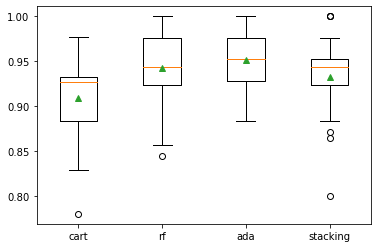

In [87]:
 # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


In [88]:
# here rf and ada is giving better performance across different folds
#so for this data set we can go with modelling of rf or ada